#Introduction
The Street View House Numbers dataset is the collection of real-world data that needs no data preparation and formatting and is used for building machine learning and Object recognition algorithms. While MNIST data set is the hello world of digit recognition SVHN can be regarded as a step higher than MNIST data set because it contains more labeled data which is over 6000,000 digits images and is based on much more challenging, unsolved real-world scenarios as it is obtained from natural scenes of house numbers from Google Street View.
[StreetView](http://ufldl.stanford.edu/housenumbers/)
## Overview of datasets




1.   10 classes (1 for each digit)
2.   73257 digits are used for training
3.   26032 digits are used for testing
4.   There are additional 531131 additional extra data for training

The data in this SVHN dataset comes in two formats:

1. Original digit images with character-level bounding boxes
2. Single character-centered MNIST like 32 by 32 images.


#Defination of Problem
SVHN is a collection of the dataset that is taken from google street view and there are some pre-challenges with this dataset as it contains images of conditions like light conditions, image quality concerns, and multiple images in one picture making it difficult to predict accurately house numbers. The problem statement of this project is to build three deep learning models CNN, Logistic regression, and feed-forward neural network using Pytorch to accurately predict house numbers utilizing SVHN dataset and compare which models perform better and why.
https://ieeexplore.ieee.org/document/9412597

###Context
The SVHN datasets can be applied to various application, for example 
1. license plate recognition where people are speeding and a camera integrated with number plate recognition can capture the vehicle number plate
2. License plate recognition for smart license.
3. House number detection
4. This along with MNIST dataset can be used in high scale data statistics and the financial sector, for example industrial annual inspection, population census, financial statements, and many more
https://ieeexplore.ieee.org/document/9412597



##Aims and objectives
###Aims
The aim of this project is to develop a Neural network using three different technologies CNN FFNN Logistic regression.

### Objective


1.   Preprocessing the dataset including techniques like resizing, and normalization.
2.   Deploying neural network model for CNN and using techniques like (Convolutional layers, max pooling layer, Activation layers, fully connected layers), FFNN(input layer, hidden layer, output layer),
Logistic Regression(input layer, output layer)
3.   Evaluating model efficiency for SVHN dataset and five feedback of why certain model performs better than other models.
4. To analyze errors that occurred in the model by interpreting the result








#Importing Essentials pytorch numpy matplotlib Module

In [70]:

from torchvision.transforms import ToTensor
import numpy as np
from torch.utils.data.dataloader import DataLoader
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import SVHN as DataSVHN
import torchvision
import torch.optim as optim
import random
import pandas as pd
from torchvision.utils import make_grid as grid
import matplotlib
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from torch.utils.data import random_split


In [71]:
torch.manual_seed(42)
random.seed(42)

# Data Accquisition and Preparation

####Downloading Traning dataset for traning the model

In [72]:
images = DataSVHN(root='data/', download=True, transform=ToTensor())

Using downloaded and verified file: data/train_32x32.mat


In [73]:
len(images)
images

Dataset SVHN
    Number of datapoints: 73257
    Root location: data/
    Split: train
    StandardTransform
Transform: ToTensor()

### From the result above we can say
 1. There are total 73257 data points
 2. data/ states that the data has been stored in data folder
 3. The split train states that the dataset is split into traun split which is by default used fr training the model for learning insights.
 4. To Tensor() is used to apply transformation which helps to convert data into tensors of pixel that are multi dimensional array which can later be used to process machine learning algorithms and Neural networks.


## **Data visualization**

###Loking out for couple sample from the traning model

In [74]:
def showPictures(pictures, name):
  x = plt.imshow(pictures.permute(1,2,0))
  print(pictures)
  name = {'picturesnames', name}
  print(name, 'Shape', pictures.shape)
  return x

tensor([[[0.0745, 0.0784, 0.0980,  ..., 0.2549, 0.3059, 0.3843],
         [0.0824, 0.0745, 0.0980,  ..., 0.2471, 0.3569, 0.5098],
         [0.0824, 0.0784, 0.0863,  ..., 0.3098, 0.4902, 0.6980],
         ...,
         [0.3451, 0.3490, 0.3294,  ..., 0.2431, 0.2627, 0.2902],
         [0.3451, 0.3412, 0.3451,  ..., 0.2353, 0.2392, 0.2549],
         [0.3294, 0.3176, 0.3412,  ..., 0.2471, 0.2431, 0.2471]],

        [[0.2118, 0.2039, 0.2235,  ..., 0.5647, 0.5804, 0.6196],
         [0.2078, 0.2039, 0.2196,  ..., 0.5373, 0.6000, 0.7059],
         [0.2078, 0.2000, 0.2039,  ..., 0.5765, 0.7098, 0.8549],
         ...,
         [0.6353, 0.6392, 0.6118,  ..., 0.5569, 0.5647, 0.5686],
         [0.6431, 0.6275, 0.6235,  ..., 0.5529, 0.5529, 0.5608],
         [0.6275, 0.6039, 0.6196,  ..., 0.5647, 0.5608, 0.5686]],

        [[0.4314, 0.4353, 0.4549,  ..., 0.8745, 0.8549, 0.8627],
         [0.4314, 0.4157, 0.4353,  ..., 0.8157, 0.8392, 0.8980],
         [0.4314, 0.4157, 0.4157,  ..., 0.8235, 0.9020, 0.

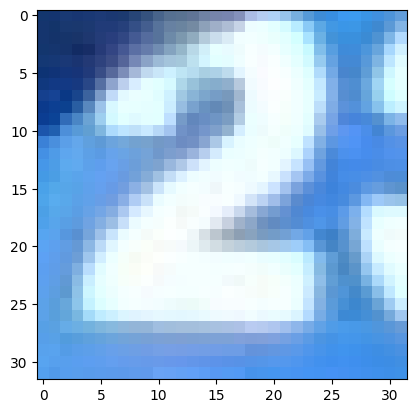

In [75]:

showPictures(*images[2])

tensor([[[0.5373, 0.5412, 0.5451,  ..., 0.4667, 0.4745, 0.4784],
         [0.5373, 0.5412, 0.5490,  ..., 0.4353, 0.4431, 0.4471],
         [0.5412, 0.5490, 0.5569,  ..., 0.3882, 0.4000, 0.4039],
         ...,
         [0.5647, 0.5647, 0.5647,  ..., 0.3961, 0.4314, 0.4510],
         [0.5647, 0.5647, 0.5569,  ..., 0.3569, 0.3961, 0.4196],
         [0.5647, 0.5608, 0.5529,  ..., 0.3333, 0.3725, 0.3922]],

        [[0.5686, 0.5725, 0.5765,  ..., 0.4745, 0.4824, 0.4863],
         [0.5686, 0.5725, 0.5765,  ..., 0.4431, 0.4510, 0.4549],
         [0.5725, 0.5765, 0.5765,  ..., 0.3961, 0.4078, 0.4118],
         ...,
         [0.5882, 0.5882, 0.5804,  ..., 0.3294, 0.3647, 0.3843],
         [0.5882, 0.5843, 0.5765,  ..., 0.2902, 0.3294, 0.3529],
         [0.5882, 0.5843, 0.5725,  ..., 0.2667, 0.3020, 0.3255]],

        [[0.5765, 0.5804, 0.5843,  ..., 0.5216, 0.5294, 0.5333],
         [0.5765, 0.5804, 0.5882,  ..., 0.4902, 0.4980, 0.5059],
         [0.5804, 0.5843, 0.5882,  ..., 0.4471, 0.4588, 0.

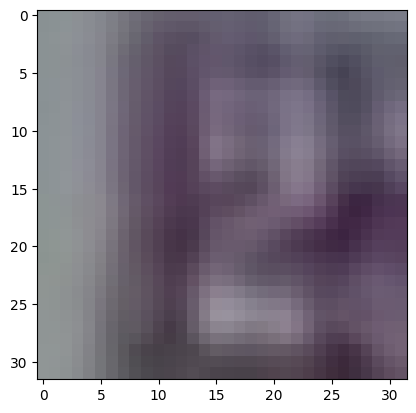

In [76]:

showPictures(*images[1226])

### Here in images data it contains two information 
1. image tensor of size torch.Size(3,32,32), 3 refers to 3 color channels red, green, Blue
2. 32 * 32 indicates the height and width pixels  of the images

## Data Processing

###**Real** world machine learning models are divided into three categories 
1. Traning (used for analyzing loss and adjusting weights)

2. Validation (used to assess the model during traning and modifying learning rate)
3. Testing (used to assess the final accuracy of the model and compare it with various modelling methodoligies)

In [77]:
# Here traning is divided into 67527 data while validation is 6000
validation_size = 6000
traning_size = len(images) - validation_size

traning_dataSet, validation_dataSet = random_split(images, [traning_size, validation_size])
len(traning_dataSet), len(validation_dataSet)

(67257, 6000)

### In order to load the data in batches for training and validation, data loaders with batch 12 is given



In [78]:

num =4

In [79]:
traning_dataLoader = DataLoader(traning_dataSet, 128,  shuffle=True, num_workers=num, pin_memory=True) 

In [80]:
validation_dataLoader = DataLoader(validation_dataSet, 128*2, num_workers=num, pin_memory=True) # creating validation dataloader


### Given that we will be using a training dataset, we ensure that it has been properly randomised so we use PyTorch class called DataLoader that iterates over the dataset
1. Shuffle=true was  set to randomly shuffel our data while loading and to help our model  generalize and perform better with each batch of data by reducing the correlation between them.

2. pin-memory and set num_workers values because we also use the GPU's power and its number of cores and using this function can speed up transformation of data in GPU because this function allows data to be loaded directly from Pinned memory

3. num_workers=4 we used this argument so that data is loaded in multiple manner which speed up data loading process


### Taking a look at first total batches of input data from dataset using grid

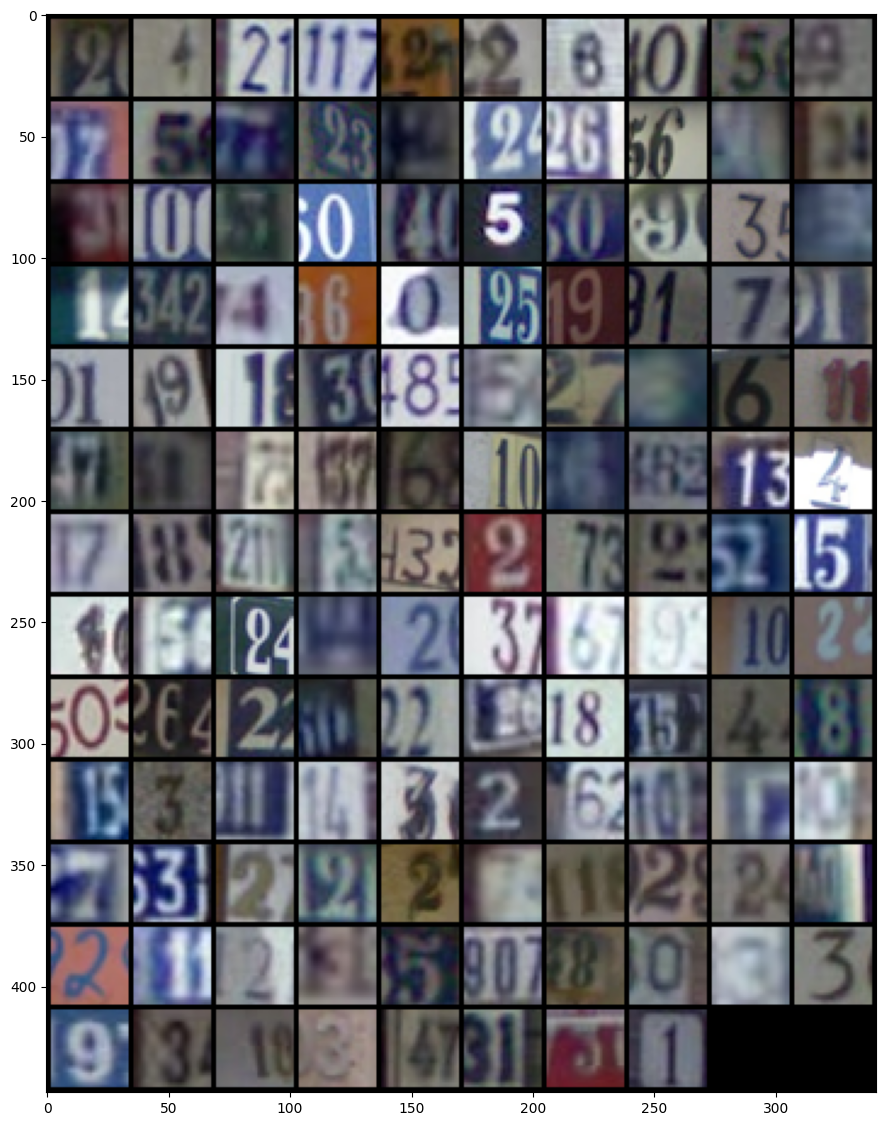

In [81]:

for number, name in traning_dataLoader:
  f, a= plt.subplots(figsize=(18, 14))
  #code below display out total batchses of images in train loader into a grid
  x =grid(number, nrow=10).permute(1, 2, 0)
  a.imshow(x)
  break

### Making a classification class that includes helper functions for validations and training, as well as an epoch and total number of epoch function that is used to evaluate and view results per epoch later in the code


# Data Modelling

In [82]:
# 
# Here we have created a nn.Module class called Classification
# it provides helper methods for traning and evaluating the images
# 
class Classification(nn.Module):

# Here we have defined a traning_function method 
# it takes images batch from the traning dataset and 
# it generates prediction using instances of nn.Module self(images). 
#  provided by torch.nn.functional as F.cross_entropy then it returns the loss
    def traning_function( self,  array):

        pictures, numberLabel = array 

        results = self(pictures)
        # Then it calculates F.cross_entropy which is a loss function feature                  
        drops = F.cross_entropy(results, numberLabel) 
        return drops
    

# Here we have defined a validation_step which is a method that is used to 
# evaluate the model and is preformed on batch of validation data.
# This helper method also calculates the accuracy which  is later
# defined in a function at the end of this code
  
    def validate_function(self, array):
        pictures, numberLabel = array 
        result = self(pictures)
        drops = F.cross_entropy(result, numberLabel)  
        positiveResult = accuracy(result, numberLabel)
        x = {'Loss_validation': drops.detach(), 'Accuracy_validation': positiveResult}           
        return x

# Here in epoch_function helper methods it takes the output provided 
# by validate_function and it calls the average loss and the average 
# accuracy onn the whole epoch numbers data
    def epoch_function(self, arrays):
        arrayDrops = [Loss_validation_value['Loss_validation'] for Loss_validation_value in arrays]

        # printing this text to track data processing values

        print('Data is at epoch_function') 

        lost_Of_Epoch_Value = torch.stack(arrayDrops).mean()   

        Epoch_Accuracy_in_batch = [Accuracy_validation_value['Accuracy_validation'] for Accuracy_validation_value in arrays]

        Accurate_Epoch_values = torch.stack(Epoch_Accuracy_in_batch).mean()  

        Loss_and_accuracy_validation={'Loss_validation': lost_Of_Epoch_Value.item(), 'Accuracy_validation': Accurate_Epoch_values.item()}
        return Loss_and_accuracy_validation

# This method is called at the end of each epoch which calculates
# the loss accuracy on traning and validation data suppose if we have 
# 10 epoch this function run 10 times after each end of epoch

    def end_epoch_function(self, ep, Total_results):
        print("Data is at end_epoch_function ")
        print("TotalEpoch [{}], traning_loss: {:.4f}, Loss_validation: {:.4f}, Accuracy_validation: {:.4f}".format(
            ep, Total_results['traning_loss'], Total_results['Loss_validation'], Total_results['Accuracy_validation']))
        print("Data evaluation completed")
        

# Below code is a helper function named accuracy its input is model outputs and labels. 
# it uses torch.max(result, dim=1) to takes the indice of the highest numbered values 
# predicted number class label and then provides the accuracy as the sippet of correct prediction
# torch.max(outputs, dim=1 is specially used to give maximum score and it links to the index for the 
# individual sample data in the batch specially if the tensor shape is 
# (batchSize and num_classes)

def accuracy(result, numberLabels):
  
# _ is used in this function because we dont have the use for one of two data extracted from the  torch.max(outputs, dim=1)
    _, predictedTensor = torch.max(result, dim=1)

# Heere below code  preds == labels returns a tensor shaped in boolean 
# of same shape where each elements satisfies the condition True.
# This simply means it only returns the predicted index that match the correct class index
# after the value is returned torch.sum adds all the True elements in Boolean tensor which is 
# the total number of accurate predictions made in each batch of data that is 128
    Tensor_pred_length = len(predictedTensor)
    return torch.tensor(torch.sum(predictedTensor == numberLabels).item()/Tensor_pred_length)

### The above code has 
1. traning_functionn method and it calculates loss and labels of the traning data
2. validate_function method calculates loss and accuracy for the batch of validation data
3. epoch_function method is used at epoch end for each validation epoch and it calculates loss and accurracy average for all the batches in the validation dataset
4. end_epoch_function it calculates the average of all traning loss, validation loss and validation accuracy when each  epoch ends.
5. There is an accuracy function defined which take the Neural network model output and labels. it gives the accuracy by comparing the predicted label with the original label.



#CNN
CNN neural netwok recognizes images by learning the unique featuers, patterns by processing the images through numbers of hidden layers like convulational layers, pooling layers fully connected layers. Each layers processes the images and recognizes a unique features and record the edges and corners of the data. Max pooling layers then reduce the resolution of the images by  down sampling the output of layers by using highest value resulting an output feature map with which now has half the width and height of the original input.

In our CNN neural network we have applied padding techinique which adds extra pixels around the images. Padding help to detect more features in the images as when a 3 by 3 kernel is moving one strides at time the border of images get exposed only once but with padding the border of images is exposed to kernel multiple times which helps the model to learn more unique features.

Below is animation of how Kernel slides over a images, what padding is how max pooling helps to reduce spatial resolution and entire image preprocess method through image and animations.


# The overall code idea below was used from a kaggle source while constructing the neural network and optimization techniques 


[# CNN Reference Link](https://www.kaggle.com/code/vanquitu/digitrecognizer-pytorch)



### We will efficiently organise and define below code layers with the help of PyTorch library.

1. super().__init__() this is used to by SVHN class to inherit parent class Classification. This process helps to access helper methods defined in above parent class which is used in child class and also inheriting this way makes the parent class Classification reusable class for testing other neural network. 


In [83]:
# class SVHN(Classification): This class SVHN extends the Classification 
# class that provides functionality for traning and evaluating every thing for
# the prediction of images its loss combine loss loss of each epoch accuracy.
class SVHN(Classification):
    def __init__(self):
        super().__init__()
        # starting to develop CNN layers using nn.Sequential and store it in container self.cnnNetworkLayers
        self.cnnNetworkLayers = nn.Sequential(
            
            # Layer1  uses nn.conv2d covulation layer and it preforms 2 dimension operation on the input tensor
            # The first argument 3 means 3 color channels images RGB and 32 means filters or output channels in 
            # this covulational layer and each of this 32 filters will store unique image features
            # nn.ReLU() is a activation function for neural network and it applies function max(0,x) for 
            # every input tensor and sets the negative value to 0 and keeps the positive value.
            # First Layer
            
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),

            # Below three lines in layer 2 indicates that it takes 
            # 32 input channels and 64 output channels with 64 unique 
            # images features and applies 3 * 3 kernel stride 1 and padding 1
            # then max pooling decrease the height and width
            # Second Layer

            nn.Conv2d(in_channels = 32, out_channels= 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            #The out value is 64 x 16 x 16
            # Below 5 lines are Third and Fourth Layer"
            # 64 input channeks and each with 128 output channels with kernel 3 stride 3 padding 1

            nn.Conv2d(in_channels= 64, out_channels = 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(), # Activation function
            nn.Conv2d(in_channels =128, out_channels =128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(), #Activation function
            #This layers preforms max pooling with 2*2 kernel size and reduce spatial dimension and stride 2
            nn.MaxPool2d(2, 2), 
            #The out value is 128 x 8 x 8

            # Below five lines of code defines fifth and sixth covulational layers
            # 128 input channels and each layer has 256 output channels with kernel 3 stride 1 padding 1
            
            nn.Conv2d(in_channels = 128, out_channels= 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(), #Activation function
            nn.Conv2d(in_channels= 256, out_channels = 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),#Activation function
            #This layers preforms max pooling with 2*2 kernel size and reduce spatial dimension and stride 2
            nn.MaxPool2d(2, 2), 
            # The out_channels is 256 x 4 x 4

            # nn.Flatten() flattens the final covulational layer into one dimensional vector
            nn.Flatten(), 
            # This line defines a linear layer which takes 256 *4*4 flattened input and  output 1024
            nn.Linear(256*4*4, 1024),

            nn.ReLU(), #Activation function
            # 512 output features and 1024 input features
            nn.Linear(1024, 512),
            nn.ReLU(),#Activation function

            # final layer converting the output layer to 10 class 0 to 9
            nn.Linear(512, 10))
        
    def forward(self, xb):
      # returning the cnn haper through forward function
        return self.cnnNetworkLayers(xb)

In [84]:
SVHNmodel = SVHN()
# SVHNmodel


### In summary the above CNN layer is made up of 21 layers which includes convolutional layer, activation layers and fully connected layers this model takes input 3 channel image Red gren blue and give output as 10 classes 
1. 10 classes are number prediction from(0 to 9)

### Checking to see if the model produced the desired results after using the batches of images. The output layer displays 10 outputs, each of which represents the probabilities for 10 classes.
<>



In [85]:
for batchImage, _ in traning_dataLoader:
      print('batchImage.shape:', batchImage.shape)
      layer_output = SVHNmodel(batchImage)
      print('out.shape:', layer_output.shape)
      break

batchImage.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])


### We define a few helper functions to move data to the GPU as needed in order to  operate GPU, if one is available. we wrote this code from git hub link and this code is taken from link below
1. This code dosenot belong to us it was completely referenced frow the link below
[https://gist.github.com/aliwaqas333/0f6060664f63ed27471cfa5307f0fb9a](https://gist.github.com/aliwaqas333/0f6060664f63ed27471cfa5307f0fb9a)



In [86]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)
class DeviceDataLoader():
  """Wrap a dataloader to move data to a device"""
  def __init__(self, dl, device):
      self.dl = dl
      self.device = device
      
  def __iter__(self):
      """Yield a batch of data after moving it to device"""
      for b in self.dl: 
          yield to_device(b, self.device)

  def __len__(self):
      """Number of batches"""
      return len(self.dl)

###  This code determines whether you have a device (type='cuda') gpu or device (type='cpu'),Based on which runtime this notebook executes


In [87]:
Device = get_default_device()
Device

device(type='cuda')

### Using the DeviceDataLoader class mentioned above to wrap training and validation dataloaders will automatically transfer the batches of data into the CPU or GPU id available.


In [88]:
train_loader1 = DeviceDataLoader(traning_dataLoader, Device)
validation_dataLoader1 = DeviceDataLoader(validation_dataLoader, Device)
to_device(SVHNmodel, Device);

### Below code has two function
1. Data Evaluation_Function : This function performs tasks on validation data by first putting the model on evaluation mode then uses validate_function to calculate validation dataset loss and accuracy and stores it in results and calls epoch_function to calculate averrage validation loss and accuracy for the overall validation dataset
2. DataFit_function takes number of parameters listed below to perform a loop. it takes
number_of_epochs,
learning  rate, 
graphical_model, 
train_loader1,
validation_dataLoader1, 
optional_function=torch.optim.SGD
as inputs and stores the accuracy and loss data for each bach for training and validation data in the history list.
3. This functions loops over numbers of epoch provided and in the meantime uses graphical_model.train to set the model into training mode
4.  Tranning_lost_data = [] is used to store training loss data for eatch batch
5. For every batch of data in the training loss, back propogation, updates on model parameter using optimizer.step() and setting the gradient value to zero using optimizer.zero_grad() is done
6. DataEvaluation_function is called to calculate loss and accuracy for validation data.
7. torch.stack(Tranning_lost_data).mean().item() This command is used to calculate the average training loss in  the model on each epoch.
8. The graphical models call  end_epoch_function listed below
def end_epoch_function(self, ep, Total_results):
        print("Data is at end_epoch_function ")
        print("TotalEpoch [{}], traning_loss: {:.4f}, Loss_validation: {:.4f}, Accuracy_validation: {:.4f}".format(
            ep, Total_results['traning_loss'], Total_results['Loss_validation'], Total_results['Accuracy_validation']))
        print("Data evaluation completed")
The above function gives a print on training loss, validation loss, and accuracy validation and the results show 10 times since we have 10 epoch. wich each epoch increasing the accuracy till the last epoch.


In [89]:
@torch.no_grad()
# DataEvaluation_function Evaluate the data
def DataEvaluation_function(graphical_model, validation_dataLoader1):
    graphical_model.eval()
    results = [graphical_model.validate_function(collection) for collection in validation_dataLoader1]
    return graphical_model.epoch_function(results)

def DataFit_function(number_of_epochs, r, graphical_model, train_loader1,validation_dataLoader1, optional_function=torch.optim.SGD):
    history = []

    optimization = optional_function(graphical_model.parameters(), r)

    for number_epochs in range(number_of_epochs):

        # Below code calculates for traning phase
        # The code just below  sets model to traning more meaning it will carry out functions like dropout, normalization of batch
        graphical_model.train()
        #lost data is stored on the array below
        Tranning_lost_data = []

        for collection in train_loader1:
          # The code below calculates each batch loss u
            batch_loss = graphical_model.traning_function(collection)

            Tranning_lost_data.append(batch_loss)
            #  batch_loss.backward preforms backward propogation which gives differences between desired output and predicted output. This is done by passing the gradients of loss by movieng it layer by layer from last layer till first layer
            batch_loss.backward()
            # optimization.step() updates the Neural network model parameters
            optimization.step()
            # Below code avoids gradient accretion
            optimization.zero_grad()

       # Below code calculates for Validation phase

        Total_results = DataEvaluation_function(graphical_model, validation_dataLoader1)


        Total_results['traning_loss'] = torch.stack(Tranning_lost_data).mean().item()
        # The code below calls end_epoch_function from classification class and it gives the result for traning and validation data whenever DataFit function is called
        graphical_model.end_epoch_function(number_epochs, Total_results)

        history.append(Total_results)
        
    return history

### to_device() takes a tensor as input and shifts them into the chosen devices

In [90]:
graphical_model_CNN = to_device(SVHN(), Device)

# Data Evaluation

### Evaluating the accuracy and loss for validation data before traning the model

In [91]:
DataEvaluation_function(graphical_model_CNN, validation_dataLoader1)

Data is at epoch_function


{'Loss_validation': 2.3014369010925293,
 'Accuracy_validation': 0.1052594855427742}

### The initial forecast Because it is a randomly generated model with 10 chances to guess a model correctly, accuracy is less than 14%.


# **We will now use some parameter like**
## learning rate as r 
## No of epochs as number_of_epochs
## Optional function as optional_function

# **While training deep neural networks**, we also use the class torch.optim.adam from the PyTorch library, which performs adaptive estimation of moment and is used in a variety of projects.


# **The Adam optimizer** is a stochastic gradient descent extension that modifies the learning rate for each parameter according to the gradient of the loss function and the pattern of prior gradients.





In [92]:
# input _size is 3072 because out image is 3 32 32 so 3*32*32 = 3072
Data_input_Value = 3072
# since we want neural network model to predict values from 0 to 9 thats 10 output
output_classes_of_numbers = 10
num_classes = 10
# we are testing accuracy and traning the model 10 times 
number_of_epochs = 10
# # setting optional function to torch.optim.Adam to 
# adjust learning rate for each parameter according the the gradient of loss function
optional_function = torch.optim.Adam
# we are keeping the learning rate to 0.001 at first
r = 0.001


In [93]:
# adding %%time to check how much time is required to find  accuracy while applying 10 epoch

Epoch_history_CNN = DataFit_function(number_of_epochs, r, graphical_model_CNN, train_loader1, validation_dataLoader1, optional_function)

Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [0], traning_loss: 1.7711, Loss_validation: 0.6262, Accuracy_validation: 0.8105
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [1], traning_loss: 0.4279, Loss_validation: 0.3413, Accuracy_validation: 0.8939
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [2], traning_loss: 0.2971, Loss_validation: 0.2844, Accuracy_validation: 0.9136
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [3], traning_loss: 0.2430, Loss_validation: 0.2649, Accuracy_validation: 0.9190
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [4], traning_loss: 0.2041, Loss_validation: 0.2595, Accuracy_validation: 0.9244
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [5], traning_loss: 0.1687, Loss_validation: 0.2492, Accuracy_v

# Logistic Regression




## The code below is a simple logistic regression
1. it has single layer nn.linear which takes input size of 3 * 32 * 32 = 3072 and reshapes it to output  tensor and then it is passed through linear layer through outputValue

The idea behind how logistic regression works was first learned from MNIST dataset from the link below, just the idea was taken and was applied to SVHN
[logistic regression](https://towardsdatascience.com/logistic-regression-on-mnist-with-pytorch-b048327f8d19#:~:text=Logistic%20regression%20is%20used%20to,between%20Logistic%20and%20Linear%20regression.)






In [94]:
class LogisticRegressionTechinique(Classification):
  def __init__(self):
      super().__init__()
      # The Line below takes input sizes and number of classes as its input.
      self.linear = nn.Linear(Data_input_Value, output_classes_of_numbers)
      #Below function activates forward function which takes 3072 input tensor which is 3 * 32 * 32
  def forward(self, flattenedArray):
      flattenedArray = flattenedArray.reshape(-1, 3072)
      outputValue = self.linear(flattenedArray)
      return outputValue

In [95]:
LogisticRegression_model = LogisticRegressionTechinique()

### Based on where this notebook is run, this code determines whether you have a device (type='cuda') gpu or device (type='cpu').


In [96]:
to_device(LogisticRegression_model, Device)


LogisticRegressionTechinique(
  (linear): Linear(in_features=3072, out_features=10, bias=True)
)

### to_device() takes a tensor as input and shifts them into the chosen devices

In [97]:

graphical_model_Logistic = to_device(LogisticRegressionTechinique(), Device)

### Evaluating the accuracy and loss for validation data before traning the model

In [98]:
DataEvaluation_function(graphical_model_Logistic, validation_dataLoader1)


Data is at epoch_function


{'Loss_validation': 2.351780652999878,
 'Accuracy_validation': 0.075125552713871}

### Here we are using DataFit_function() to train the model for a certain specified number of epoch.
1. It returns value in dictionary 
2. It contains traning loss and accuracy for traning dataloader and validation loss and validation accuracy for validation data loader for wach epoch
3. The history can be analyzed to fix learning rate number of epoch to run as well as stop the model after it reaches its highest accuracy point

In [99]:

# adding %%time to check how much time is required to find  accuracy while applying 10 epoch
%%time

Epoch_history_Logistic = DataFit_function(10, r, graphical_model_Logistic, train_loader1, validation_dataLoader1, optional_function)




Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [0], traning_loss: 2.2672, Loss_validation: 2.2924, Accuracy_validation: 0.2157
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [1], traning_loss: 2.2328, Loss_validation: 2.2130, Accuracy_validation: 0.2586
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [2], traning_loss: 2.2189, Loss_validation: 2.2490, Accuracy_validation: 0.2231
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [3], traning_loss: 2.2204, Loss_validation: 2.2475, Accuracy_validation: 0.1855
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [4], traning_loss: 2.2054, Loss_validation: 2.2156, Accuracy_validation: 0.2507
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [5], traning_loss: 2.2080, Loss_validation: 2.2227, Accuracy_v

# Feed forward Neural Network
The Feed forward neural network is a type of neural network approach  in which input information flows in only one dirrection that is from input layers to number of hidden layer according to the model. It usually consists of input layer hidden layer and output layers. The idea behind neural network is that the networl the input layer recieves the images pixel value and when it is passed through each hidden layer, it applies weights to the input pixels and produce the output, then the output layer produces  possible distrubutation of images 

## The code below is which uses FFNN to construct MNIST data set is used as an idea to construct FFNN for SVHN dataset
[FFNN_Idea ](https://gist.github.com/devil-cyber/308e206a6af03e3f47f9abfe7f3d9c91)




In [100]:
class FeedForward_NeuralNetwork(Classification):
  def __init__(self,output_classes_of_numbers, Data_input_Value):
    super().__init__()
    self.firstLayer = nn.Linear(Data_input_Value, 128) # input sise is 3 * 32 * 32 = 3072 with 3 being RGB color channels and with height and with parameters
    self.secondLayer = nn.Linear(128, 64) #this layer input is 128 and output is 64
    self.thirdLayer = nn.Linear(64, 32) # third layer input is 64 an output is 32
    self.fourthLayer = nn.Linear(32, output_classes_of_numbers) #output contains 10 classes probabilities from 0 to 9

  def forward(self, FFNN_variable):
    # flatenning the data into tensors
    results = FFNN_variable.view(FFNN_variable.size(0), -1)
    # Getting the initial outcome from data using hidden layer 1

    results = self.firstLayer(results)
    #Using relu to map positive input to 1 and negative to 0
    results = F.relu(results)
    # Getting the initial outcome from data using hidden layer 2
    results = self.secondLayer(results)
    results = F.relu(results)
    # Getting the initial outcome from data using hidden layer 3
    results = self.thirdLayer(results)
    results = F.relu(results)
    # Getting the initial outcome from data using hidden layer 4
    results = self.fourthLayer(results)
    return results



In [101]:
FeedForward_NeuranNetwork = FeedForward_NeuralNetwork(output_classes_of_numbers, Data_input_Value)

### Based on where this notebook is run, this code determines whether you have a device (type='cuda') gpu or device (type='cpu').


In [102]:
graphical_FFNN = to_device(FeedForward_NeuranNetwork, Device)


### to_device() takes a tensor as input and shifts them into the chosen devices

### Evaluating the accuracy and loss for validation data before traning the model

In [103]:
DataEvaluation_function(graphical_FFNN, validation_dataLoader1)


Data is at epoch_function


{'Loss_validation': 2.280470371246338,
 'Accuracy_validation': 0.1419735848903656}

### Here we are using DataFit_function() to train the model for a certain specified number of epoch.
1. It returns value in dictionary 
2. It contains traning loss and accuracy for traning dataloader and validation loss and validation accuracy for validation data loader for wach epoch
3. The history can be analyzed to fix learning rate number of epoch to run as well as stop the model after it reaches its highest accuracy point

In [104]:
# adding %%time to check how much time is required to find  accuracy while applying 10 epoch
%%time

Epoch_history_FFNN = DataFit_function(10, r, graphical_FFNN, train_loader1, validation_dataLoader1, optional_function)




Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [0], traning_loss: 2.2328, Loss_validation: 2.1562, Accuracy_validation: 0.1975
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [1], traning_loss: 1.8371, Loss_validation: 1.6487, Accuracy_validation: 0.4118
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [2], traning_loss: 1.5536, Loss_validation: 1.4883, Accuracy_validation: 0.4855
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [3], traning_loss: 1.4556, Loss_validation: 1.3974, Accuracy_validation: 0.5265
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [4], traning_loss: 1.3895, Loss_validation: 1.3422, Accuracy_validation: 0.5559
Data evaluation completed
Data is at epoch_function
Data is at end_epoch_function 
TotalEpoch [5], traning_loss: 1.3378, Loss_validation: 1.3200, Accuracy_v

#Visualisations

# plotting all the accuracy vs epochs rate for all three neural networks

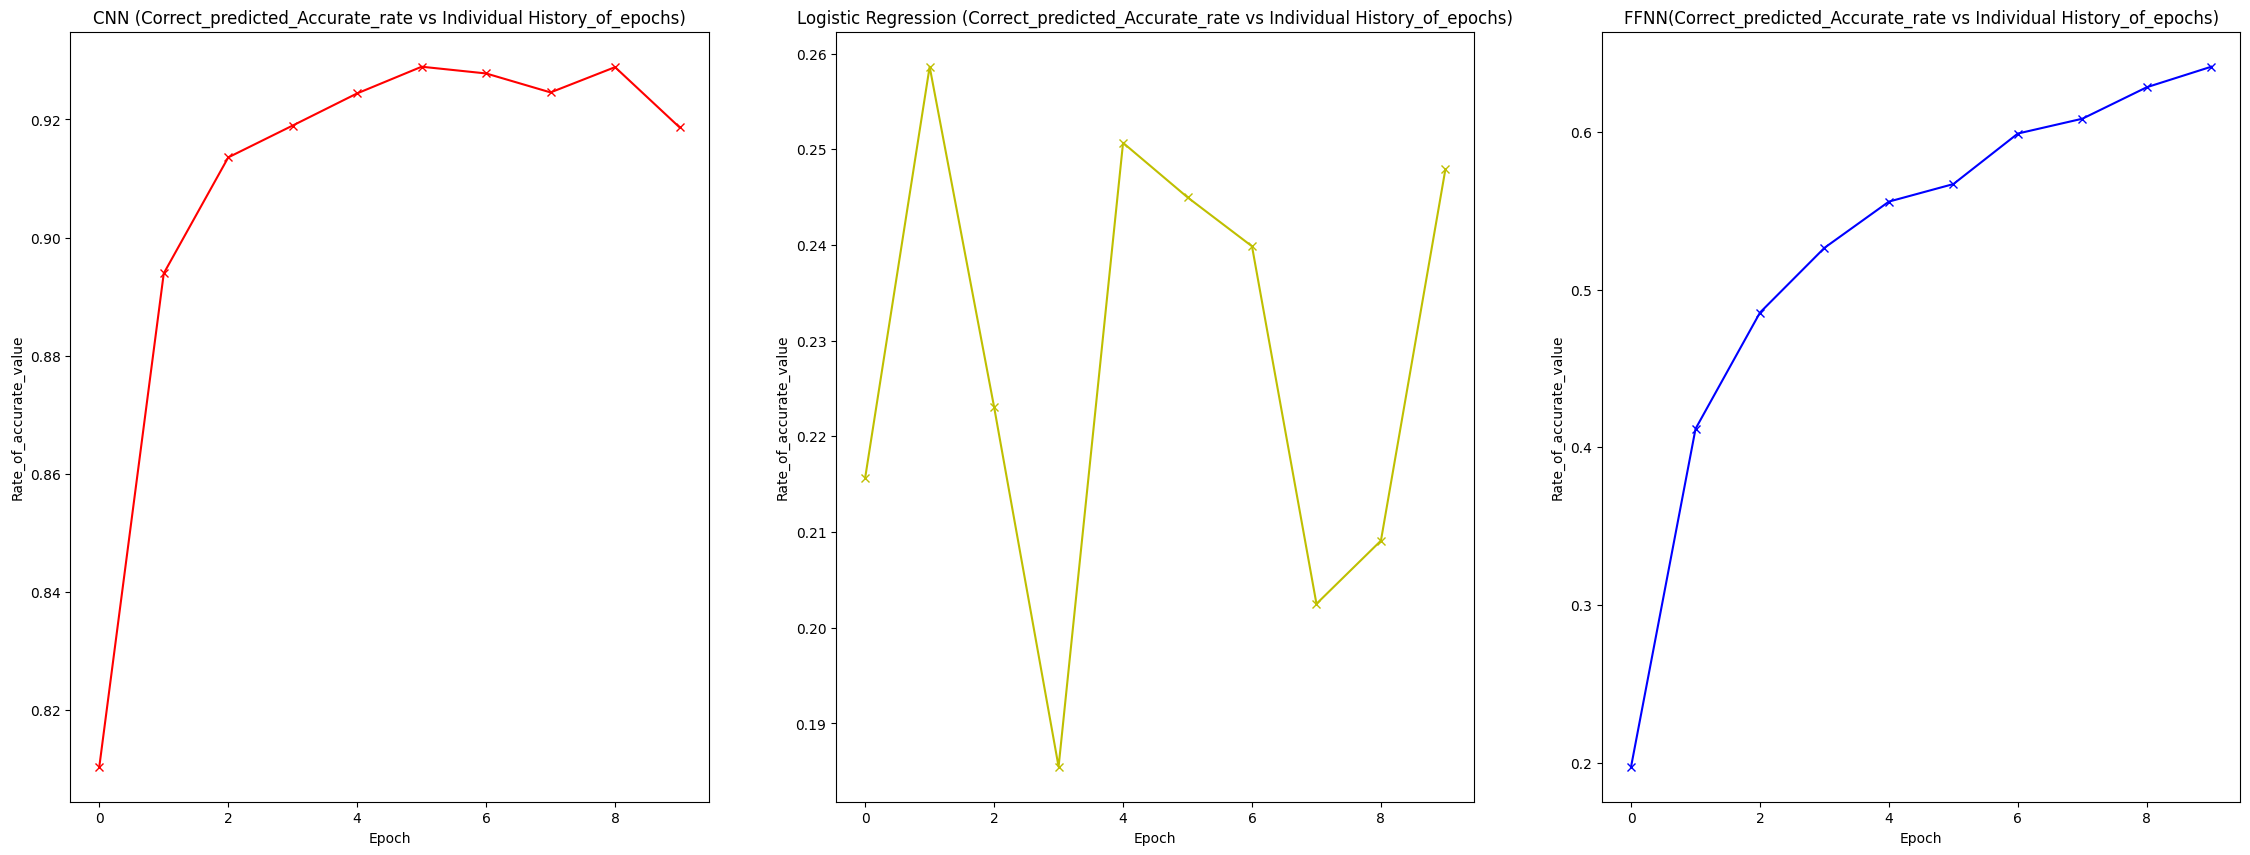

In [105]:

fig, axis = plt.subplots(1,3, figsize=(28,10) )


axis[0].set_xlabel('Epoch')
axis[0].set_ylabel('Rate_of_accurate_value')
axis[0].set_title('CNN (Correct_predicted_Accurate_rate vs Individual History_of_epochs)')
Predicted_accurate_rate = [CNN_Accurate_Rate_History_['Accuracy_validation'] for CNN_Accurate_Rate_History_ in Epoch_history_CNN]
axis[0].plot(Predicted_accurate_rate, '-xr')



axis[1].set_xlabel('Epoch')
axis[1].set_ylabel('Rate_of_accurate_value')
axis[1].set_title('Logistic Regression (Correct_predicted_Accurate_rate vs Individual History_of_epochs)')
Predicted_accurate_rate = [Logistic_Regression_Accurate_Rate_History_['Accuracy_validation'] for Logistic_Regression_Accurate_Rate_History_ in Epoch_history_Logistic]
axis[1].plot(Predicted_accurate_rate, '-xy')

axis[2].set_xlabel('Epoch')
axis[2].set_ylabel('Rate_of_accurate_value')
axis[2].set_title('FFNN(Correct_predicted_Accurate_rate vs Individual History_of_epochs)')
Predicted_accurate_rate = [FFNN_Accurate_Rate_History_['Accuracy_validation'] for FFNN_Accurate_Rate_History_ in Epoch_history_FFNN]
axis[2].plot(Predicted_accurate_rate, '-xb')



In [106]:
data = {'Name':['CNN', 'Logistic Regression','Feed forward Neural Network'], 'Epoch':[10,10,10], 'Learning_rate':[0.001,0.001,0.001],'Optimizer':['torch.optim.Adam','torch.optim.Adam','torch.optim.Adam'], 'Accuracy':[Epoch_history_CNN[9]['Accuracy_validation'],Epoch_history_Logistic[9]['Accuracy_validation'],Epoch_history_FFNN[9]['Accuracy_validation']]}
dataFrame = pd.DataFrame(data)

### Data Evaluation on three Neural networks based on 10 epoch and Accuracy
1. CNN: This model was trained for 10 epoch using learning rate of 0.01 and adam optimizer was used to update weight and biases in order to minimize predicted and actual data differences and it tooke total 2 minutes 5 seconds and reached final accuracy of 0.9182 (** note this accuracy can change slightly everytime this code is run)
2. FFNN: This model was trained for 10 epoch using learning rate of 0.01 and adam optimizer was used to update weight and biases in order to minimize predicted and actual data differences and it took total 1 minutes 11 seconds and reached final accuracy of 0.6414 (** note this accuracy can change slightly everytime this code is run)
3. Logistic Regression: This model was trained for 10 epoch using learning rate of 0.01 and adam optimizer was used to update weight and biases in order to minimize predicted and actual data differences and it took total 1 minutes 10 seconds and reached final accuracy of 0.2479 (** note this accuracy can change slightly everytime this code is run)

So analyzing all these three outputs for each technology CNN performed best in 10 epochs with an accuracy of 0.9182.


# plotting all the loss vs epoch rate in both traning and validation data for (CNN, FFNN, Logistic Regression)

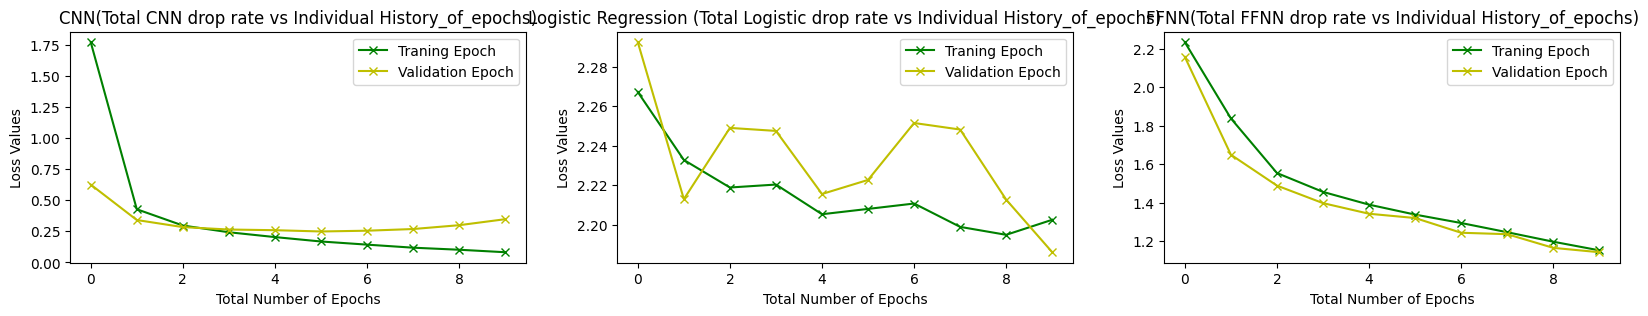

In [107]:
fig, axis = plt.subplots(1,3,figsize=(20,3))
#Training loss and Validation loss result in graph for CNN neural network module
lost_data_in_CNN_traning = [traning_EpochCNN.get('traning_loss') for traning_EpochCNN in Epoch_history_CNN]
CNN_validation_losses = [validation_EpochCNN['Loss_validation'] for validation_EpochCNN in Epoch_history_CNN]
axis[0].set_xlabel('Total Number of Epochs')
axis[0].set_ylabel('Loss Values')
axis[0].set_title('CNN(Total CNN drop rate vs Individual History_of_epochs)')
axis[0].plot(lost_data_in_CNN_traning, '-gx')
axis[0].plot(CNN_validation_losses, '-yx')
axis[0].legend(['Traning Epoch', 'Validation Epoch'])

lost_data_in_CNN_traning = [traning_dataLogistic_regression.get('traning_loss') for traning_dataLogistic_regression in Epoch_history_Logistic]
CNN_validation_losses = [validation_Epoch_Logistic['Loss_validation'] for validation_Epoch_Logistic in Epoch_history_Logistic]
axis[1].set_xlabel('Total Number of Epochs')
axis[1].set_ylabel('Loss Values')
axis[1].set_title('Logistic Regression (Total Logistic drop rate vs Individual History_of_epochs)')
axis[1].plot(lost_data_in_CNN_traning, '-gx')
axis[1].plot(CNN_validation_losses, '-yx')
axis[1].legend(['Traning Epoch', 'Validation Epoch'])


lost_data_in_FFNN_traning = [traning_data_FFNN.get('traning_loss') for traning_data_FFNN in Epoch_history_FFNN]
FFNN_validation_losses = [validation_EpochFFNN['Loss_validation'] for validation_EpochFFNN in Epoch_history_FFNN]
axis[2].set_xlabel('Total Number of Epochs')
axis[2].set_ylabel('Loss Values')
axis[2].set_title('FFNN(Total FFNN drop rate vs Individual History_of_epochs)')
axis[2].plot(lost_data_in_FFNN_traning, '-gx')
axis[2].plot(FFNN_validation_losses, '-yx')
axis[2].legend(['Traning Epoch', 'Validation Epoch'])



### In CNN model
1. THis model was trained for 10 epoch and it achieved traning loss of 0.130600 and validation loss of 0.204600.
These value  states that this model was able to learn the patterns and insights from  the data very well and was also able to conduct well for the new data which is validation data as validation loss is not much high than traning data, However this model can be improved more by stoping the epoch as validation loss starts to increase as it can lead traning the model to overfitting.

In [108]:
data = {'Name':['CNN'], 'Epoch':[10],'Traning Loss':[Epoch_history_CNN[9]['traning_loss']],'Validation Loss':[Epoch_history_CNN[9]['Loss_validation']]}
dataFrame = pd.DataFrame(data)

dataFrame.style.background_gradient(cmap='Blues')

,Name,Epoch,Traning Loss,Validation Loss
0,CNN,10,0.082398,0.347971


### In Logistic Regression model
1. This model was trained for 10 epoch and it achieved traning loss of 2.2026 and validation loss of 2.1861.
These value  states that this model suggest that was not able to learn data patterns in both traning and validation data as  both of their loss score is pretty similar and this neural network approach might not be suitable for recognizing complex images as it may not be able to perform well based on above values.

In [109]:
data = {'Name':['Logistic Regression'], 'Epoch':[10],'Traning Loss':[Epoch_history_Logistic[9]['traning_loss']],'Validation Loss':[Epoch_history_Logistic[9]['Loss_validation']]}
dataFrame = pd.DataFrame(data)

dataFrame.style.background_gradient(cmap='Blues')

,Name,Epoch,Traning Loss,Validation Loss
0,Logistic Regression,10,2.202554,2.186140


### In FFNN  model
1. THis model was trained for 10 epoch and it achieved traning loss of 1.152200 and validation loss of 1.142500.
These value  states that this model was able to learn some pattern and insights from traning data in certain way and was also able to learn pattern in validation data as validation loss and traning loss are similar in numbers.

In [110]:
data = {'Name':['FFNN'], 'Epoch':[10],'Traning Loss':[Epoch_history_FFNN[9]['traning_loss']],'Validation Loss':[Epoch_history_FFNN[9]['Loss_validation']]}
dataFrame = pd.DataFrame(data)

dataFrame.style.background_gradient(cmap='Blues')

,Name,Epoch,Traning Loss,Validation Loss
0,FFNN,10,1.152216,1.142478


### SO comparing all three neural network 

### So Overally CNN has the highest accuracy followed by FFNN and logistic regression has the lowest accuracy out of all neural networks
so it is expected that CNN and FFNN perform reasonably well while compared to logistic regression

Overall Logistic regression is usally used to predict binary classification to predict whether the input is true or false or O and 1.
Logistic regression preforms better when there is binary 

# Individual_image_pridiction is for testing individual pictures from test dataset

In [111]:
# graphical_model_CNN

## Evaluation of three Neural Network

## Loading the test dataset to test data with trained  neural networks

In [112]:
test_dataset = DataSVHN(root='data/', download=True,split='test' ,transform=ToTensor())

Using downloaded and verified file: data/test_32x32.mat


In [113]:
len(test_dataset)

26032

## The function below is used to get the prediction  for individual image data

In [114]:
def Individual_image_pridiction(Pictures, graphical_Neural_network):
    # turning into individual data(1)
    Individual_batch_Pic = to_device(Pictures.unsqueeze(0), Device)
   # Calling particular neural network model and geting prediction from it
    graphical_neural_network_prediction = graphical_Neural_network(Individual_batch_Pic)
    # torch.max(neural_nework, dim) predicts the index number which shows high probability
    _, Highest_probability_index  = torch.max(graphical_neural_network_prediction, dim=1)
    # Retrieve the class label
    return Highest_probability_index

## The function below is used for predicting individual image and uses above function as a helper method and gives result 
1. Name of the neural network
2. Actual Label value
3. Predicted Label

In [115]:
 
def predicted_return_value_individual(value, neuralnetworkModel, name):
    img, label = value
    plt.imshow(img.permute(1,2,0))  
    a = Individual_image_pridiction(img, neuralnetworkModel)
    print(name,"label", label, 'Predicted', a.item())

# print(Information)

## Extracting data from test loader with batch no 128 and loading it to DeviceDataLoader

In [116]:


test_data_loader = DataLoader(test_dataset,128, shuffle=False, num_workers=num, pin_memory=True) # creating Traninig dataloader

In [117]:
Test_dataLoader1 = DeviceDataLoader(test_data_loader, Device)
len(test_data_loader)

204

## This Function calculates the highest loss image per batch and stores it in 3 array batch number batch value and image index 
1. we are making this function so that we can check highest image loss picture from eatch batch and also find out at what index do they lie, this indices will later be used to call that particular images to check weather or not the neural system will be able to detect its highest loss image or not.

In [118]:
def PeakLossFunction(graphical):
  PeakLoss = torch.zeros(len(Test_dataLoader1),device=device) # generates loss random value according to length of batch

  peakLossIndex = torch.zeros(len(Test_dataLoader1), device=device)
  
  #Setting the Neural network to evaluational mode
  graphical.eval()
  with torch.no_grad():
    for index, (tensor, name) in enumerate(Test_dataLoader1):

      
      # at first predicting the input batch
      result = graphical(tensor)

      # Secondly predicting the loss for the batch of data
      loss = F.cross_entropy(result, name, reduction='none')

      #highest loss and its indices per batch
      Highest_lossValue, highest_loss_index = torch.max(loss, dim=0)

      # Highest loss per index per batch update is done in the below code
      PeakLoss[index] = Highest_lossValue

      peakLossIndex[index] = index * 128 + highest_loss_index
      #Defining 3 lists to store value so that it can be displayed using  pandas to note label name index and their loss value
  high_loss_image_index_per_batch = []
  High_loss_per_image_value = []
  batch_number = []

  for i in range(len(Test_dataLoader1)):
    high_loss_image_index_per_batch.append(int(peakLossIndex[i].item()))
    # print(PeakLoss[i])
    High_loss_per_image_value.append(float(PeakLoss[i]))
    batch_number.append(i)
  # print('HighestValue',High_loss_per_image_value)

  data = {'batchNo': batch_number, 'Loss':High_loss_per_image_value, 'batchIndex':high_loss_image_index_per_batch}

  dataFrame = pd.DataFrame(data)

  dataFrame.style.background_gradient(cmap='Blues')

  return dataFrame.style.background_gradient(cmap='Blues')


#Error Analysis


## Peak Loss for CNN model

In [119]:
PeakLossFunction(graphical_model_CNN)

,batchNo,Loss,batchIndex
0,0,7.966883,96
1,1,14.052283,238
2,2,7.539712,374
3,3,9.951118,466
4,4,8.828698,528
5,5,10.662475,641
6,6,9.437329,783
7,7,7.762396,990
8,8,9.617273,1103
9,9,6.341585,1231


####** (CNN) **Testing some samples from highest loss value per batch in CNN model to check if the System detects or not and explaining why the system doesnot detects this particular image 

1. Note that the images index will not always be the same with the index from above table you can randomly select any index with high loss value and test it out using the model

CNN label 0 Predicted 8


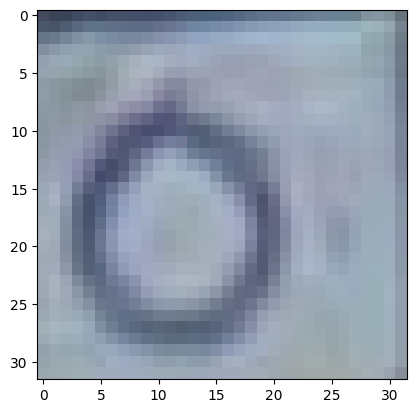

In [120]:
# Testing some samples from highest loss value per batch in CNN model(Sometime the highest image index might fluctuate and show different index)
predicted_return_value_individual(test_dataset[26021],graphical_model_CNN,'CNN')

### As you can see in above example the highest loss value images cannot be detected well from cnn techonology. The reason on whhy thus happened are:
1. Because of the Visual complexicity  of the images because with a naked eye some one can say its 0 but its actually 6. This problem can be solved with advanced neural network architecture like Resnet, DenseNet(used for dense feature extraction)
2. This situation may arise due to insufficient traning data may be loading the extra file of SVHN dataset and traning more images in neural networks can resolve this issue.



## Peak Loss for FFNN model

In [121]:
PeakLossFunction(graphical_FFNN)

,batchNo,Loss,batchIndex
0,0,10.903298,114
1,1,7.852918,250
2,2,10.396957,347
3,3,7.592449,433
4,4,8.416655,567
5,5,6.279847,673
6,6,6.841461,825
7,7,7.062188,910
8,8,9.245722,1143
9,9,9.439754,1230


####** (FFNN) **Testing some samples from highest loss value per batch in FFNN model to check if the System detects or not and explaining why the system doesnot detects this particular image

FFNN label 0 Predicted 5


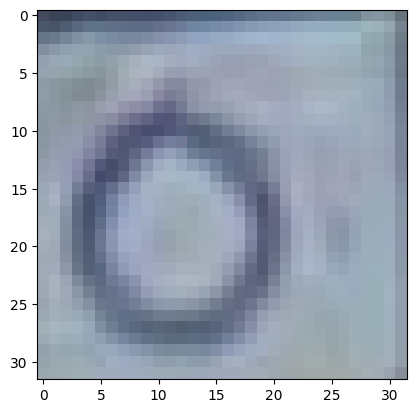

In [122]:

# Testing some samples from highest loss value per batch in FFNN model
predicted_return_value_individual(test_dataset[26021],graphical_FFNN,'FFNN')

### Our feed forward neural network is not a deep deural network so it struggles to detect complex patterns
1. since the image looks have the highest loss value its simple a non-linear relation to the features input and our simple FFNN might not be able to detect this type of images.
to improve this  error alternative network like CNN RNN(Recurrent neural network) should be considered

## Peak Loss for Logistic Regression Model 


In [123]:
PeakLossFunction(graphical_model_Logistic)

,batchNo,Loss,batchIndex
0,0,6.803769,101
1,1,4.666628,222
2,2,5.151373,332
3,3,5.634885,387
4,4,5.086099,557
5,5,5.769979,677
6,6,5.996584,849
7,7,5.656954,975
8,8,6.066433,1144
9,9,5.097037,1190



###** (Logistic Regression) **Testing some samples from highest loss value per batch in Logistic Regression model to check if the System detects or not and explaining why the system doesnot detects this particular image

Logistic Regression label 6 Predicted 1


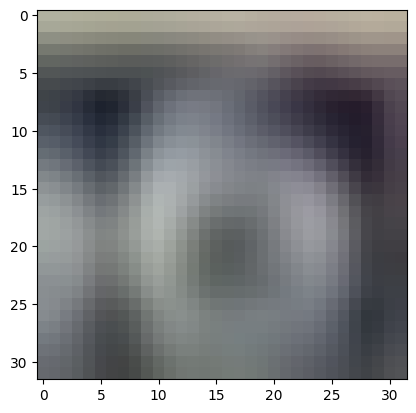

In [124]:

# Testing some samples from highest loss value per batch in Logistic Regression model
predicted_return_value_individual(test_dataset[25991],graphical_model_Logistic,'Logistic Regression')

### Our Logistic Regression model is not a deep deural network so it struggles to detect complex patterns
1.  Logistic Regression preforms well under binary classification that is either 0 or 1 but Since SVHN is a multiple classs classification problem ranging fro (0 to 9). 
2. Since its accuracy is very low when compared to CNN and FFNN, this model cannot detects images well

## Comparisions

## Checking All 3 model prediction for one images

### 1.Here in above test case every models predicts  the Label with its correct value

CNN label 2 Predicted 2
FFNN label 2 Predicted 2
Logistic Regression label 2 Predicted 2


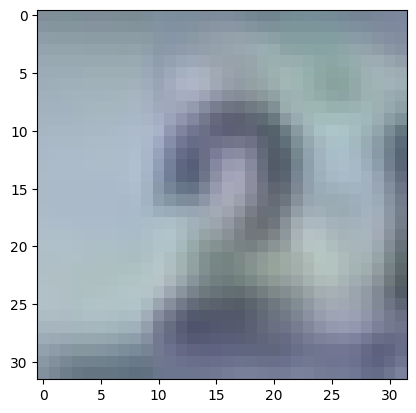

In [125]:
predicted_return_value_individual(test_dataset[1],graphical_model_CNN,'CNN')
predicted_return_value_individual(test_dataset[1],graphical_FFNN,'FFNN')
predicted_return_value_individual(test_dataset[1],graphical_model_Logistic,'Logistic Regression')

### 2.Here in below test case only CNN model predicts the test case

CNN label 0 Predicted 0
FFNN label 0 Predicted 1
Logistic Regression label 0 Predicted 1


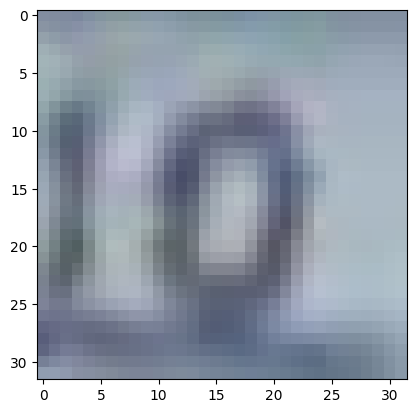

In [126]:
predicted_return_value_individual(test_dataset[3],graphical_model_CNN,'CNN')
predicted_return_value_individual(test_dataset[3],graphical_FFNN,'FFNN')
predicted_return_value_individual(test_dataset[3],graphical_model_Logistic,'Logistic Regression')

### 3.Here in below test cases, Both CNN and FFNN predicts the number, while logistic regression models fails to do so

CNN label 1 Predicted 1
FFNN label 1 Predicted 1
Logistic Regression label 1 Predicted 2


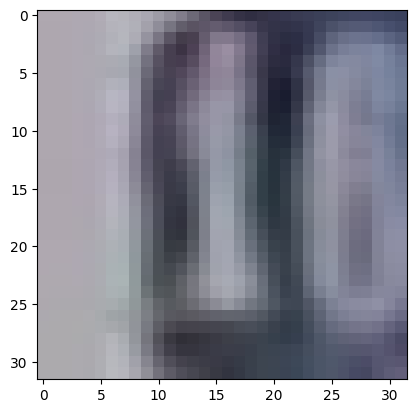

In [127]:
predicted_return_value_individual(test_dataset[25684],graphical_model_CNN,'CNN')
predicted_return_value_individual(test_dataset[25684],graphical_FFNN,'FFNN')
predicted_return_value_individual(test_dataset[25684],graphical_model_Logistic,'Logistic Regression')


### 4.Here in below test case CNN model and logistic Regression models accurately predicts the given value , while FFNN model fails

CNN label 3 Predicted 3
FFNN label 3 Predicted 1
Logistic Regression label 3 Predicted 3


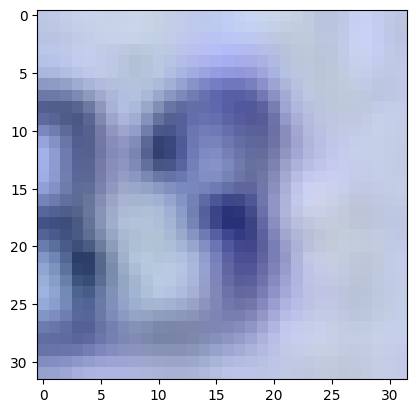

In [128]:
predicted_return_value_individual(test_dataset[3340],graphical_model_CNN,'CNN')
predicted_return_value_individual(test_dataset[3340],graphical_FFNN,'FFNN')
predicted_return_value_individual(test_dataset[3340],graphical_model_Logistic,'Logistic Regression')


## Creating a function to test our personal test data set

In [129]:

# This takes the input image and predicts according to the neural network provided
def NormalEvaluation_of_predicted_return_value(value, neuralnetworkModel, name):
    picture = value
    plt.imshow(picture.permute(1, 2, 0))  
    print(name,'prediction Value:', Individual_image_pridiction(picture, neuralnetworkModel))

# print(Information)

# Evaluation for Our own data to check CNN vs FFNN vs Logistic regression

In [130]:
#importing our own test images from github
!git clone 'https://github.com/Birajpokharel11/SVHN-pictures.git'

fatal: destination path 'SVHN-pictures' already exists and is not an empty directory.


In [131]:
!ls
!cd SCHN-pictures

data  sample_data  SVHN-pictures
/bin/bash: line 0: cd: SCHN-pictures: No such file or directory


## Note If you want to retest any images uploaded from git hub the code stops so plz run the cell from git clone to all the way down

In [132]:
from PIL import Image
import torchvision.transforms as transforms

In [133]:
!cd SVHN-pictures
!ls

data  sample_data  SVHN-pictures


# Resize the input image using transforms so that our images can be detected by the system

In [134]:
Image = Image.open('SVHN-pictures/download.jpg')

In [135]:
#converting the images into the model readable form so that out neural network can predict personal random images 
transformation = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor(), transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])])
pic = transformation(Image)
pic.size()

torch.Size([3, 32, 32])

### Loading the personal image into three neural network model


CNN prediction Value: tensor([6], device='cuda:0')
FFNN prediction Value: tensor([4], device='cuda:0')
Logistic prediction Value: tensor([4], device='cuda:0')


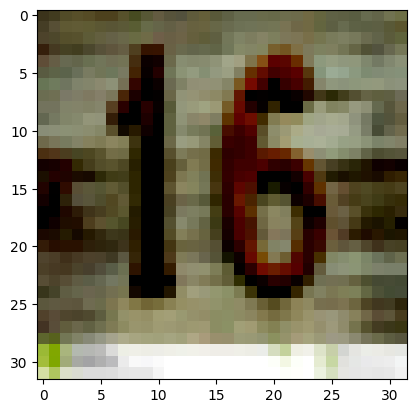

In [136]:

NormalEvaluation_of_predicted_return_value(pic, graphical_model_CNN,'CNN')
NormalEvaluation_of_predicted_return_value(pic, graphical_FFNN,'FFNN')
NormalEvaluation_of_predicted_return_value(pic, graphical_model_Logistic,'Logistic')

## Discussion and achievement of Objectives

### It is hence concluded our Model that is trained under CNN, FFNN, Logistic regression are able to handle and detect only single images but it still do not have inbuild function to detect multiple image number.
1. The most efficient one is CNN with ober 90 percent accuracy and it detects almost every images other than the images with highest loss value.
2. FFNN comes next to CNN which is able to detect images with over 65 % accuracy and is able to dect most of the images  this feature was also not able to detect highest loss images.
3. The Logistic Regression was unable to detect most of the images and rarely detected the images from the test data.

To conclude this project we can say that CNN is able to recognige most of the images and can be sucessfully trained to handle images data. This model can be integrated with web technology and software and user can upload the images and system will give their predicted value.

In the future detailed research can be conducted and different neural network approaches can be conducted to detect images with multiple values this model can be used for video analysis and recognization of the digit and can be used for overspeeding detection, license number detection and it can help the local officer to reduce many social issues.




# References
Anon., 2023a. basic function for GPU feature in PyTorch [online]. Available from: https://gist.github.com/aliwaqas333/0f6060664f63ed27471cfa5307f0fb9a [Accessed 14 May 2023].

>


Anon., 2023b. Logistic Regression on MNIST with PyTorch | by Asad Mahmood | Towards Data Science [online]. Available from: https://towardsdatascience.com/logistic-regression-on-mnist-with-pytorch-b048327f8d19 [Accessed 14 May 2023].


>


Anon., 2023c. Feed Forward Neural Net MNIST dataset classifier using Pytorch [online]. Available from: https://gist.github.com/devil-cyber/308e206a6af03e3f47f9abfe7f3d9c91 [Accessed 14 May 2023].


>


Guo, X., Liu, J., Zhou, S., Zhu, E. and Dong, S., 2020. Image representation learning by transformation regression. Proceedings - International Conference on Pattern Recognition, 526–533.
 
